In [1]:
import mlflow as ml
import numpy as np
ml.set_tracking_uri("../mlruns")
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def get_all_artf(run_id, name = None, keyword = None):
	if name is None:
		name = keyword
	runinfo  = ml.get_run(run_id)
	print(runinfo)
	art_uri = runinfo.info.artifact_uri
	art_lst = ml.artifacts.list_artifacts(run_id=run_id)
	art_nms = [i.path for i in art_lst]
	out_dct = {}
	for n in art_nms:
		if ".json" in n:
		# print(n)
			if name is None:
				# print(n)
				val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
				out_dct[n] = val
			else:
				if name in n:
					val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
					out_dct[n] = val
	return out_dct

In [10]:
artf1 = get_all_artf("95dfe4f38c2a4e55abce2ec7f5b212b5")
artf1 = pd.DataFrame(artf1).T
artf1

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'param_run2_f2',
 'mlflow.source.git.commit': '7b0ef780784ad3f167f0e808b2eb1ed0ff071678',
 'mlflow.source.name': 'param_1.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/286845418117162243/95dfe4f38c2a4e55abce2ec7f5b212b5/artifacts', end_time=1712698032884, experiment_id='286845418117162243', lifecycle_stage='active', run_id='95dfe4f38c2a4e55abce2ec7f5b212b5', run_name='param_run2_f2', run_uuid='95dfe4f38c2a4e55abce2ec7f5b212b5', start_time=1712683430619, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


,iters,N,SCENARIO,MODEL_DICT,SAMPLER_DICT,SEEDS,cov_hdi,cov_ci,iv_hdi,iv_ci,rmse,bias,time,seed_addl
iters.json,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prm_tune_1000_draw_1000_trees_100_1000_params.json,NaN,1000,"{'type': 'param_check_1', 'x_vars': 10, 'VAR_C...","{'trees': 100, 'split_rules': ['pmb.Continuous...","{'draws': 1000, 'tune': 1000, 'cores': 5, 'cha...",[99000],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prm_tune_1000_draw_1000_trees_100_1000_stats.json,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.987, 0.995, 0.97, 0.998, 0.994, 0.991, 0.9...","[[0.965, 0.98, 0.96, 0.997, 0.995, 0.981, 0.935]]","[[0.0685517258346769, 0.12217549581659305, 0.1...","[[0.07078531244099057, 0.1251120721086543, 0.1...","[[0.01588756865093553, 0.02698361155677247, 0....","[[0.0017110949187990122, 0.010849086434132758,...",NaN,NaN
prm_tune_1000_draw_1000_trees_100_1000_stats_tst.json,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.992, 0.997, 0.982, 0.999, 0.996, 0.991, 0....","[[0.968, 0.985, 0.973, 0.998, 0.993, 0.977, 0....","[[0.07206209824010089, 0.127617698527412, 0.19...","[[0.07438165410553416, 0.13054515965456767, 0....","[[0.01629543175417301, 0.026577798291570903, 0...","[[0.0006848683728849781, 0.00976818763210918, ...",NaN,NaN
prm_tune_1000_draw_1000_trees_100_1000_time.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626.512203,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prm_tune_100_draw_500_trees_50_1000_params.json,NaN,1000,"{'type': 'param_check_1', 'x_vars': 10, 'VAR_C...","{'trees': 50, 'split_rules': ['pmb.ContinuousS...","{'draws': 500, 'tune': 100, 'cores': 5, 'chain...",[99000],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prm_tune_100_draw_500_trees_50_1000_stats.json,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.97, 0.988, 0.981, 0.999, 0.999, 0.995, 0.9...","[[0.837, 0.941, 0.955, 1.0, 0.999, 0.972, 0.901]]","[[0.08808444029647146, 0.1620714730260394, 0.2...","[[0.09292883389623205, 0.1680744293388766, 0.2...","[[0.02508571121489296, 0.04040364699795051, 0....","[[0.0032748290902180365, 0.016688096331402738,...",NaN,NaN
prm_tune_100_draw_500_trees_50_1000_stats_tst.json,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.971, 0.984, 0.972, 1.0, 0.998, 0.992, 0.978]]","[[0.879, 0.946, 0.957, 1.0, 0.995, 0.972, 0.904]]","[[0.09061361679839257, 0.16641577769752247, 0....","[[0.09580857061317069, 0.17227804589632556, 0....","[[0.025340179559426298, 0.039511892568729494, ...","[[0.001165258380861776, 0.013982125569561337, ...",NaN,NaN
prm_tune_100_draw_500_trees_50_1000_time.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.241674,NaN


In [201]:
artf1.to_excel("../artf_param.xlsx")

In [86]:
artf12 = artf1[artf1.index.str.contains("stats")].copy()

# pull out parms
idx = artf12.index.to_series()
# idx = idx.reset_index(drop=True)
# print(idx)
tune = idx.str.extract("tune_(.+)_draw")
draw = idx.str.extract("draw_(.+)_trees")
trees = idx.str.extract("trees_(.+)_1000",expand=False)

artf12.insert(0, "tune", tune)
artf12.insert(0, "draw", draw)
artf12.insert(0, "trees", trees)

artf12

artf_trn = artf12[~artf12.index.str.contains("tst")].copy()
artf_tst = artf12[artf12.index.str.contains("tst")].copy()


In [100]:
# artf_trn["cov_ci"]
# artf_trn["iv_ci"][0]
artf_trn["rmse"]
artf_trn["bias"]
artf_trn

,trees,draw,tune,iters,N,SCENARIO,MODEL_DICT,SAMPLER_DICT,SEEDS,cov_hdi,cov_ci,iv_hdi,iv_ci,rmse,bias,time,seed_addl
prm_tune_1000_draw_1000_trees_100_1000_stats.json,100,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.987, 0.995, 0.97, 0.998, 0.994, 0.991, 0.9...","[[0.965, 0.98, 0.96, 0.997, 0.995, 0.981, 0.935]]","[[0.0685517258346769, 0.12217549581659305, 0.1...","[[0.07078531244099057, 0.1251120721086543, 0.1...","[[0.01588756865093553, 0.02698361155677247, 0....","[[0.0017110949187990122, 0.010849086434132758,...",NaN,NaN
prm_tune_1000_draw_1000_trees_200_1000_stats.json,200,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.972, 0.983, 0.963, 0.975, 0.987, 0.972, 0....","[[0.956, 0.971, 0.952, 0.982, 0.988, 0.98, 0.9...","[[0.07204466055834771, 0.13114439147324827, 0....","[[0.07466533661387194, 0.13464655704904205, 0....","[[0.01883773373473838, 0.03320584100680061, 0....","[[0.0014180271844994625, 0.010191870476585574,...",NaN,NaN
prm_tune_1000_draw_1000_trees_20_1000_stats.json,20,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.968, 0.97, 0.914, 0.999, 0.993, 0.953, 0.8...","[[0.649, 0.802, 0.816, 0.999, 0.984, 0.91, 0.8...","[[0.08255914192838455, 0.14778412354130796, 0....","[[0.08552622260661186, 0.15183271144227534, 0....","[[0.026858686500281784, 0.042174309308748256, ...","[[0.0036672413963519013, 0.016928189473886596,...",NaN,NaN
prm_tune_1000_draw_1000_trees_50_1000_stats.json,50,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.98, 0.989, 0.97, 1.0, 0.996, 0.986, 0.952]]","[[0.869, 0.942, 0.934, 0.997, 0.993, 0.954, 0....","[[0.06986183618380414, 0.12457670327842463, 0....","[[0.07228362360922913, 0.12755612258456175, 0....","[[0.01842911453745112, 0.029113369767443442, 0...","[[0.0021886221329931407, 0.012591020439886226,...",NaN,NaN
prm_tune_1000_draw_2000_trees_100_1000_stats.json,100,2000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.986, 0.989, 0.973, 0.997, 0.995, 0.993, 0....","[[0.939, 0.967, 0.95, 0.996, 0.993, 0.978, 0.9...","[[0.06875389864214315, 0.12342460305660856, 0....","[[0.07091252423770103, 0.12617963474559596, 0....","[[0.01670894713130628, 0.02829033826718071, 0....","[[0.0016717024991575954, 0.010875340768786108,...",NaN,NaN
prm_tune_1000_draw_2000_trees_200_1000_stats.json,200,2000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.971, 0.982, 0.97, 0.975, 0.985, 0.974, 0.9...","[[0.962, 0.979, 0.958, 0.983, 0.986, 0.982, 0....","[[0.07407345734570661, 0.13447420339448998, 0....","[[0.07670714254663565, 0.1378642952680158, 0.2...","[[0.019029486962576298, 0.03319067032516, 0.05...","[[0.0013081827021339501, 0.009591261072521784,...",NaN,NaN
prm_tune_1000_draw_2000_trees_20_1000_stats.json,20,2000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.797, 0.942, 0.834, 0.955, 0.979, 0.916, 0....","[[0.495, 0.646, 0.722, 0.961, 0.972, 0.873, 0....","[[0.07576920069071409, 0.13500482645268555, 0....","[[0.07822496910271887, 0.13808174052205155, 0....","[[0.026136777803211667, 0.040488875586346604, ...","[[0.0035711199247567393, 0.016524250332272537,...",NaN,NaN
prm_tune_1000_draw_2000_trees_50_1000_stats.json,50,2000,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.992, 0.993, 0.977, 1.0, 0.995, 0.977, 0.946]]","[[0.897, 0.962, 0.942, 0.996, 0.99, 0.947, 0.86]]","[[0.06874561724484873, 0.12182242226108879, 0....","[[0.07083577431272849, 0.12431738055220656, 0....","[[0.01703348234956525, 0.02717867998298393, 0....","[[0.002334198621237733, 0.013267281935150917, ...",NaN,NaN
prm_tune_1000_draw_500_trees_100_1000_stats.json,100,500,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.974, 0.981, 0.951, 0.99, 0.992, 0.983, 0.9...","[[0.942, 0.964, 0.932, 0.992, 0.987, 0.962, 0....","[[0.06400830770936575, 0.11417365071278246, 0....","[[0.06611830098781737, 0.11700860532454141, 0....","[[0.01572167521965546, 0.02684844238013506, 0....","[[0.0017795483415916696, 0.011518114712696249,...",NaN,NaN
prm_tune_1000_draw_500_trees_200_1000_stats.json,200,500,1000,NaN,NaN,NaN,NaN,NaN,NaN,"[[0.971, 0.975, 0.949, 0.974, 0.984, 0.972, 0....","[[0.95, 0.967, 0.941, 0.981, 0.986, 0.98, 0.946]]","[[0.07123053960254727, 0.1300336

Text(0.5, 0, 'Number Trees')

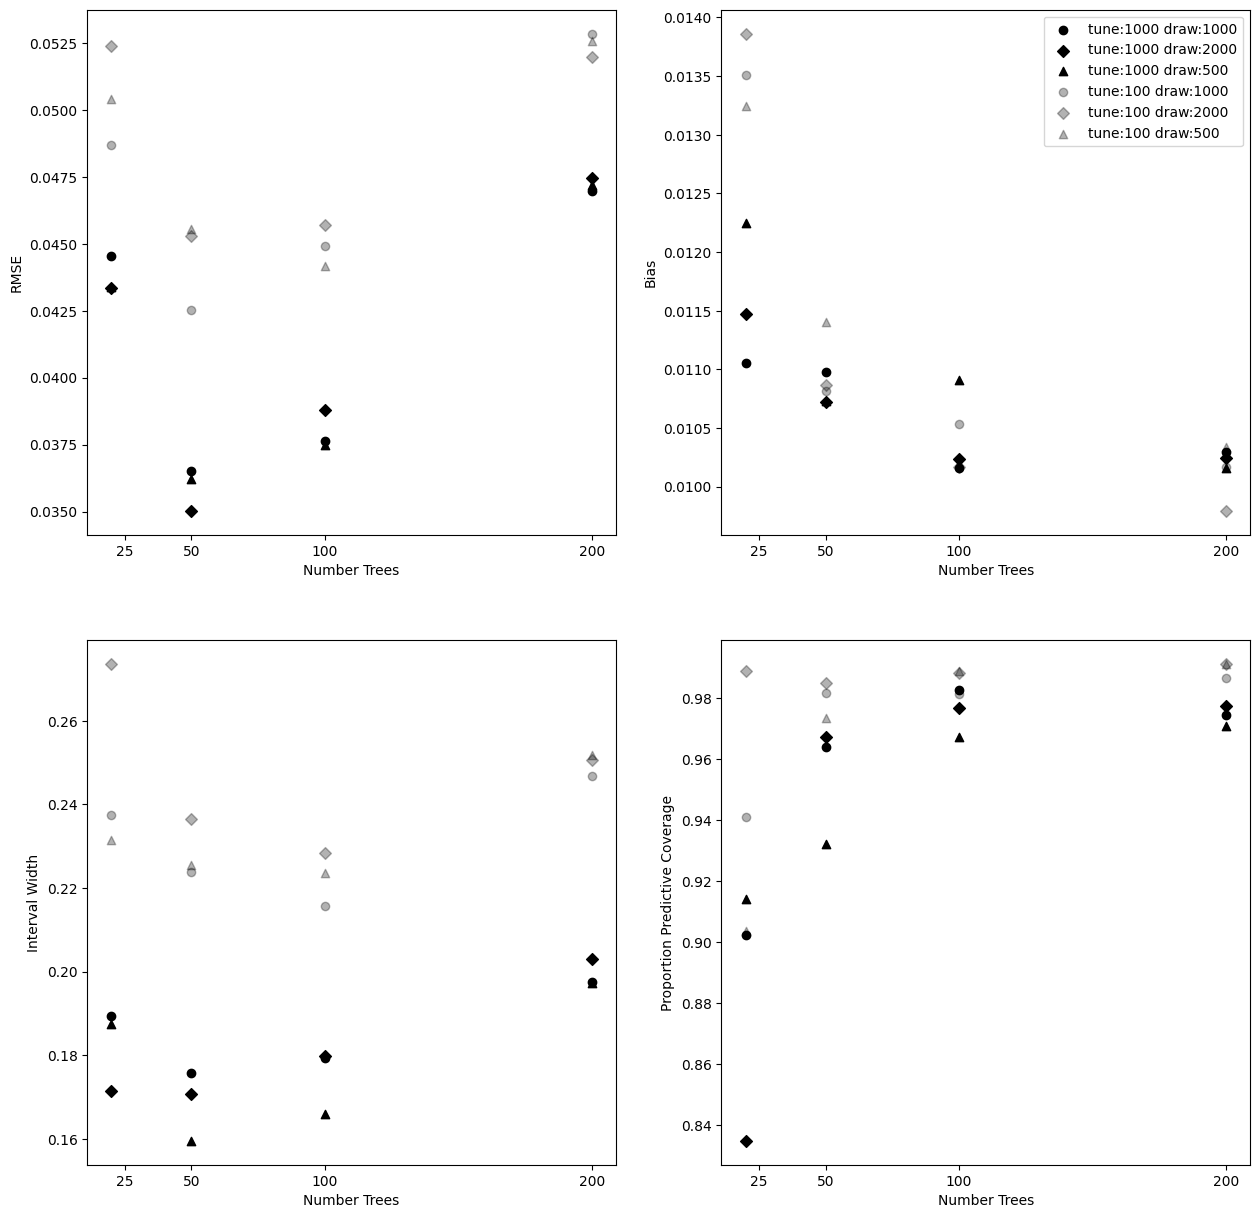

In [199]:

# mean time evaluation (uses the index 3)
# rmse1 = artf_trn["rmse"].apply(lambda z: z[0][3])
# plt.plot(artf_trn["trees"].astype("int"), rmse1, "o", label=artf_trn.index)
# plt.legend()

alpha_tune = {"100":0.3, "1000":1}
shape_draw = {"500":"^", "1000":"o", "2000":"D"}

fig,ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
lbl_list = []
for idx, r in artf_trn.iterrows():
	# trees is x
	tree = int(r.loc["trees"])
	draw = r.loc["draw"]
	tune = r.loc["tune"]
	alpha = alpha_tune[tune]
	shp = shape_draw[draw]
	# y value
	# rmse =  r.loc["bias"][0][3]
	rmse = np.mean(r.loc["rmse"][0][1:-1])
	bias = np.mean(r.loc["bias"][0][1:-1])
	iv = np.mean(r.loc["iv_ci"][0][1:-1])
	cov = np.mean(r.loc["cov_ci"][0][1:-1])

	
	lbl = "tune:"+tune+" draw:"+draw
	if lbl in lbl_list:
		ax[0,0].scatter(tree, rmse, marker=shp, alpha=alpha, color= "black")
		ax[0,1].scatter(tree, bias, marker=shp, alpha=alpha, color= "black")
		ax[1,0].scatter(tree, iv, marker=shp, alpha=alpha, color= "black")
		ax[1,1].scatter(tree, cov, marker=shp, alpha=alpha, color= "black")
		# plt.scatter(tree, rmse, marker=shp, alpha=alpha, color= "black")
	else:
		lbl_list.append(lbl)
		# plt.scatter(tree, rmse, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[0,0].scatter(tree, rmse, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[0,1].scatter(tree, bias, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[1,0].scatter(tree, iv, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[1,1].scatter(tree, cov, marker=shp, alpha=alpha, color= "black", label=lbl)
		
	
	# break
# plt.legend()
ax[0,0].set_xticks([25,50,100,200])
ax[0,1].set_xticks([25,50,100,200])
ax[1,0].set_xticks([25,50,100,200])
ax[1,1].set_xticks([25,50,100,200])
ax[0,1].legend()
ax[0,0].set_ylabel("RMSE")
ax[0,1].set_ylabel("Bias")
ax[1,0].set_ylabel("Interval Width")
ax[1,1].set_ylabel("Proportion Predictive Coverage")
ax[0,0].set_xlabel("RMSE")
ax[0,0].set_xlabel("Number Trees")
ax[0,1].set_xlabel("Number Trees")
ax[1,0].set_xlabel("Number Trees")
ax[1,1].set_xlabel("Number Trees")



# plt.ylabel("RMSE")

# artf_trn["rmse"][0]

Text(0.5, 0, 'Number Trees')

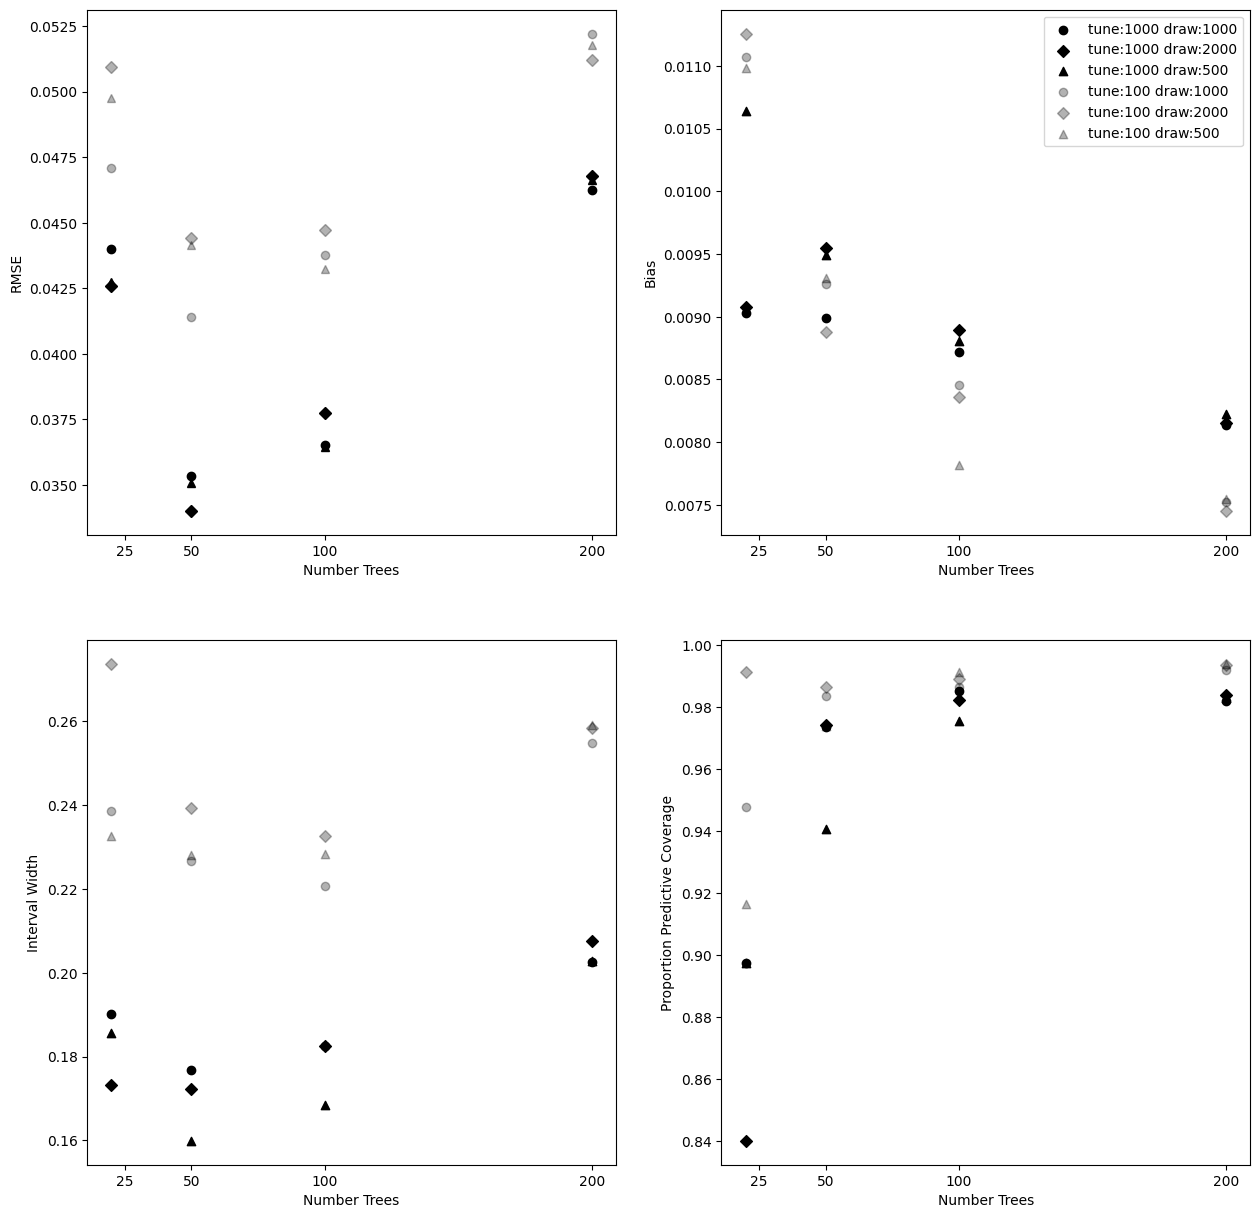

In [267]:

# mean time evaluation (uses the index 3)
# rmse1 = artf_trn["rmse"].apply(lambda z: z[0][3])
# plt.plot(artf_trn["trees"].astype("int"), rmse1, "o", label=artf_trn.index)
# plt.legend()

alpha_tune = {"100":0.3, "1000":1}
shape_draw = {"500":"^", "1000":"o", "2000":"D"}

fig,ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
lbl_list = []
for idx, r in artf_tst.iterrows():
	# trees is x
	tree = int(r.loc["trees"])
	draw = r.loc["draw"]
	tune = r.loc["tune"]
	alpha = alpha_tune[tune]
	shp = shape_draw[draw]
	# y value
	# rmse =  r.loc["bias"][0][3]
	rmse = np.mean(r.loc["rmse"][0][1:-1])
	bias = np.mean(r.loc["bias"][0][1:-1])
	iv = np.mean(r.loc["iv_ci"][0][1:-1])
	cov = np.mean(r.loc["cov_ci"][0][1:-1])

	
	lbl = "tune:"+tune+" draw:"+draw
	if lbl in lbl_list:
		ax[0,0].plot(tree, rmse, marker=shp, alpha=alpha, color= "black")
		ax[0,1].scatter(tree, bias, marker=shp, alpha=alpha, color= "black")
		ax[1,0].scatter(tree, iv, marker=shp, alpha=alpha, color= "black")
		ax[1,1].scatter(tree, cov, marker=shp, alpha=alpha, color= "black")
		# plt.scatter(tree, rmse, marker=shp, alpha=alpha, color= "black")
	else:
		lbl_list.append(lbl)
		# plt.scatter(tree, rmse, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[0,0].plot(tree, rmse, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[0,1].scatter(tree, bias, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[1,0].scatter(tree, iv, marker=shp, alpha=alpha, color= "black", label=lbl)
		ax[1,1].scatter(tree, cov, marker=shp, alpha=alpha, color= "black", label=lbl)
		
	
	# break
# plt.legend()
ax[0,0].set_xticks([25,50,100,200])
ax[0,1].set_xticks([25,50,100,200])
ax[1,0].set_xticks([25,50,100,200])
ax[1,1].set_xticks([25,50,100,200])
ax[0,1].legend()
ax[0,0].set_ylabel("RMSE")
ax[0,1].set_ylabel("Bias")
ax[1,0].set_ylabel("Interval Width")
ax[1,1].set_ylabel("Proportion Predictive Coverage")
ax[0,0].set_xlabel("RMSE")
ax[0,0].set_xlabel("Number Trees")
ax[0,1].set_xlabel("Number Trees")
ax[1,0].set_xlabel("Number Trees")
ax[1,1].set_xlabel("Number Trees")


# plot the true function


In [203]:
from bart_survival import surv_bart as sb
from bart_survival import simulation as sm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [206]:
SCENARIO = {
    "type": "param_check_1",
    "x_vars": 10, 
    "VAR_CLASS": [2,2,1,1,1],
    "VAR_PROB":[.5,.5,None,None,None],
    # "scale_f": "10+ 2.5*x_mat[:,0]",
    "scale_f": "20 + 4*x_mat[:,0] + 5*x_mat[:,1] + (1.4*x_mat[:,2])**2 - 2*x_mat[:,3]*x_mat[:,4]",
    "shape_f": "1.6 + 1.2 * x_mat[:,0] ",
    "cens_scale":None
}

In [223]:
rng = np.random.default_rng(99)


In [228]:
x_mat = sm.get_x_matrix(
        N = 100,
        x_vars = SCENARIO["x_vars"], 
        VAR_CLASS=SCENARIO["VAR_CLASS"],
        VAR_PROB= SCENARIO["VAR_PROB"],
        rng = rng
    )
event_dict, sv_true, sv_scale_true = sm.simulate_survival(
	x_mat = x_mat,
	scale_f=SCENARIO["scale_f"],
	shape_f=SCENARIO["shape_f"],
	cens_scale=SCENARIO["cens_scale"],
	rng = rng
)

mean shape 2.2960000000000007
mean scale 25.285111767199997
mean time draws 22.639325376911888


In [257]:
x_mat2 = sm.get_x_matrix(
        N = 100,
        x_vars = SCENARIO["x_vars"], 
        VAR_CLASS=SCENARIO["VAR_CLASS"],
        VAR_PROB= SCENARIO["VAR_PROB"],
        rng = rng
    )
event_dict2, sv_true2, sv_scale_true2 = sm.simulate_survival(
	x_mat = x_mat2,
	scale_f=SCENARIO["scale_f"],
	shape_f=SCENARIO["shape_f"],
	cens_scale=SCENARIO["cens_scale"],
	rng = rng
)

mean shape 2.1880000000000006
mean scale 24.838533069599993
mean time draws 21.34931537193341


In [258]:
# print(x_mat[:5,:])
# x_mat2[:5,:]
print(sv_true["hz_true"][:5,10:15])
print(sv_true2["hz_true"][:5,10:15])


[[0.01787101 0.02090107 0.02414017 0.02758499 0.03123249]
 [0.05779075 0.06088797 0.0638835  0.06678817 0.06961094]
 [0.01685361 0.01971117 0.02276587 0.02601457 0.02945442]
 [0.02870517 0.03357218 0.03877496 0.04430817 0.05016694]
 [0.05302164 0.05586326 0.0586116  0.06127656 0.06386638]]
[[0.01497295 0.01751164 0.02022547 0.02311166 0.02616766]
 [0.03535826 0.03725324 0.03908601 0.04086318 0.04259024]
 [0.02642432 0.03090461 0.03569398 0.04078753 0.04618078]
 [0.01793509 0.02097601 0.02422672 0.02768389 0.03134447]
 [0.02487664 0.02909452 0.03360338 0.0383986  0.04347596]]


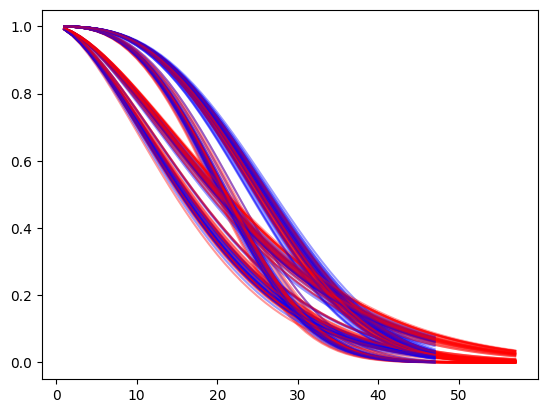

In [261]:

# sv_true2["sv_true"]
# for i in range(sv_true["sv_true"].shape[0]):
for i in range(100):
	plt.plot(sv_true["true_times"], sv_true["sv_true"][i, :], color = "blue", alpha=0.4)
	plt.plot(sv_true2["true_times"], sv_true2["sv_true"][i, :], color = "red", alpha=0.4) 


In [231]:
print(sv_true["sv_true"].mean(0))
sv_true2["sv_true"].mean(0)

[0.99704248 0.99086416 0.98219    0.97125507 0.95818158 0.94304632
 0.92590606 0.90681055 0.88581065 0.86296412 0.83834016 0.81202293
 0.78411432 0.75473585 0.72402974 0.69215903 0.65930674 0.62567406
 0.59147768 0.55694616 0.52231575 0.48782551 0.45371225 0.4202053
 0.38752146 0.35586038 0.32540042 0.29629543 0.2686723  0.2426296
 0.21823707 0.1955362  0.17454151 0.1552427  0.13760729 0.12158363
 0.10710419 0.0940889  0.08244842 0.07208713 0.06290602 0.05480503
 0.04768518 0.04145028 0.03600824 0.03127208 0.02716065]


array([0.99704248, 0.99086416, 0.98219   , 0.97125507, 0.95818158,
       0.94304632, 0.92590606, 0.90681055, 0.88581065, 0.86296412,
       0.83834016, 0.81202293, 0.78411432, 0.75473585, 0.72402974,
       0.69215903, 0.65930674, 0.62567406, 0.59147768, 0.55694616,
       0.52231575, 0.48782551, 0.45371225, 0.4202053 , 0.38752146,
       0.35586038, 0.32540042, 0.29629543, 0.2686723 , 0.2426296 ,
       0.21823707, 0.1955362 , 0.17454151, 0.1552427 , 0.13760729,
       0.12158363, 0.10710419, 0.0940889 , 0.08244842, 0.07208713,
       0.06290602, 0.05480503, 0.04768518, 0.04145028, 0.03600824,
       0.03127208, 0.02716065, 0.02359907, 0.02051889, 0.0178582 ,
       0.01556144, 0.01357918, 0.0118678 , 0.01038907])

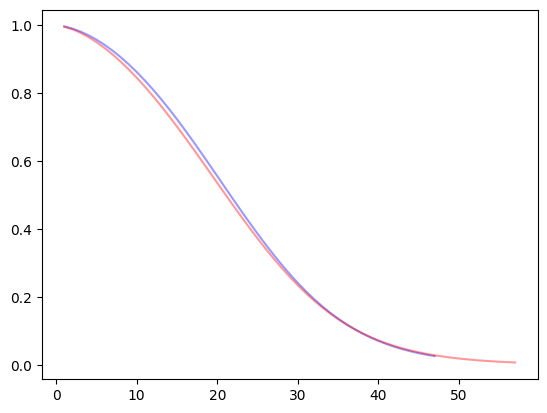

In [264]:

plt.plot(sv_true["true_times"], sv_true["sv_true"].mean(0), color = "blue", alpha=0.4)
plt.plot(sv_true2["true_times"], sv_true2["sv_true"].mean(0), color = "red", alpha=0.4) 